In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_HealthCare.csv')

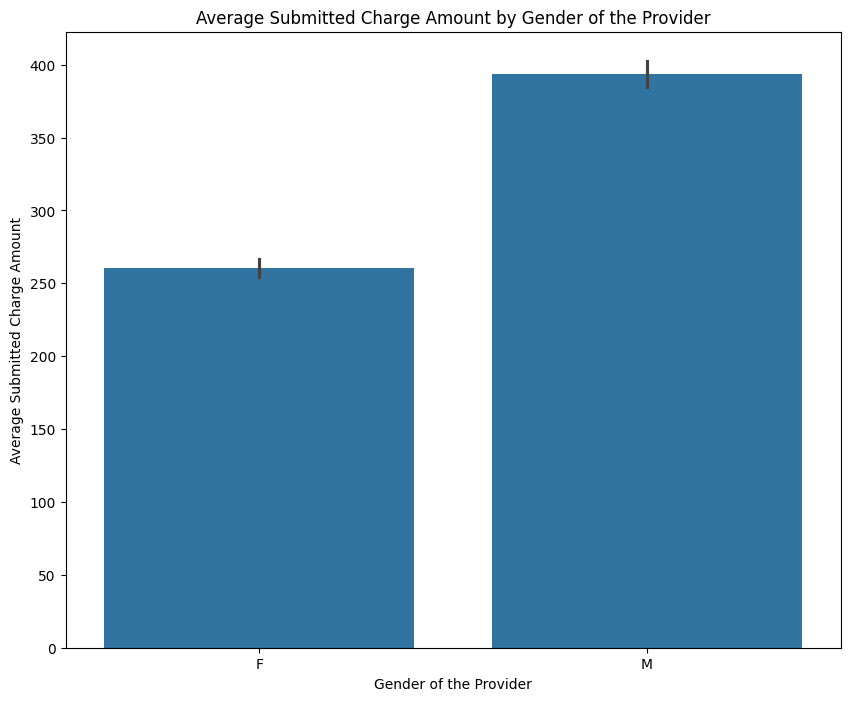

In [177]:
plt.figure(figsize=(10,8))
sn.barplot(x ='Gender of the Provider', y = 'Average Submitted Charge Amount', data=df, estimator='mean')
plt.title('Average Submitted Charge Amount by Gender of the Provider')
plt.xlabel('Gender of the Provider')
plt.ylabel('Average Submitted Charge Amount')
plt.show()

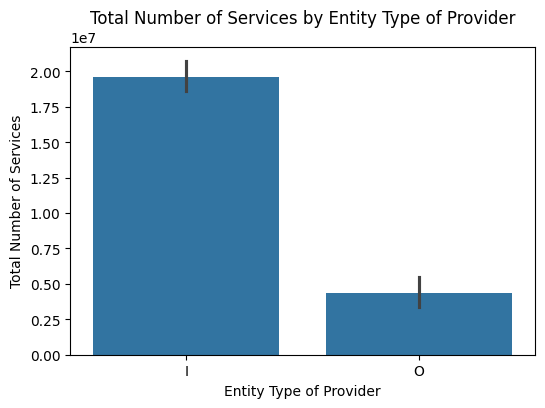

In [3]:
plt.figure(figsize=(6, 4))
sn.barplot(x='Entity Type of the Provider', y='Number of Services', data=df, estimator='sum')
plt.title('Total Number of Services by Entity Type of Provider')
plt.xlabel('Entity Type of Provider')
plt.ylabel('Total Number of Services')
plt.show()

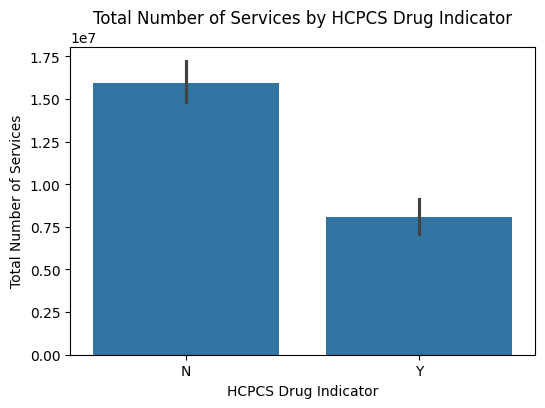

In [137]:
plt.figure(figsize=(6, 4))
sn.barplot(x='HCPCS Drug Indicator', y='Number of Services', data=df, estimator='sum')
plt.title('Total Number of Services by HCPCS Drug Indicator')
plt.xlabel('HCPCS Drug Indicator')
plt.ylabel('Total Number of Services')
plt.show()

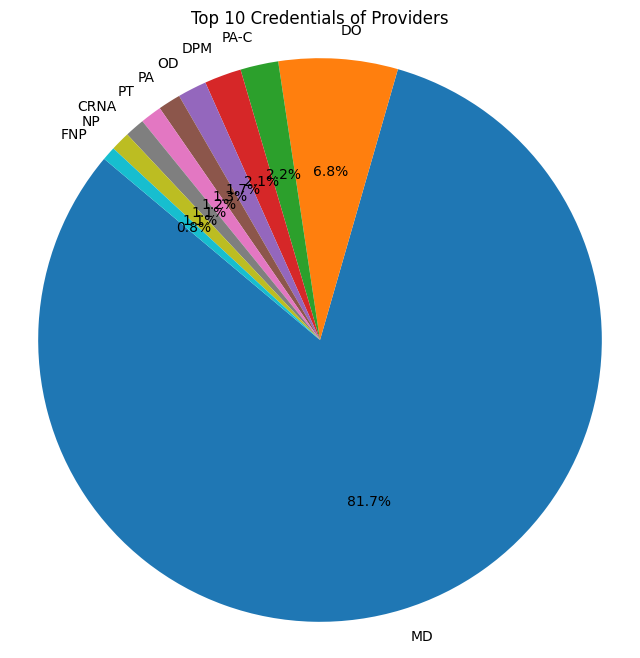

In [5]:
top_credentials = df['Credentials of the Provider'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_credentials, labels=top_credentials.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Credentials of Providers')
plt.axis('equal')  
plt.show()

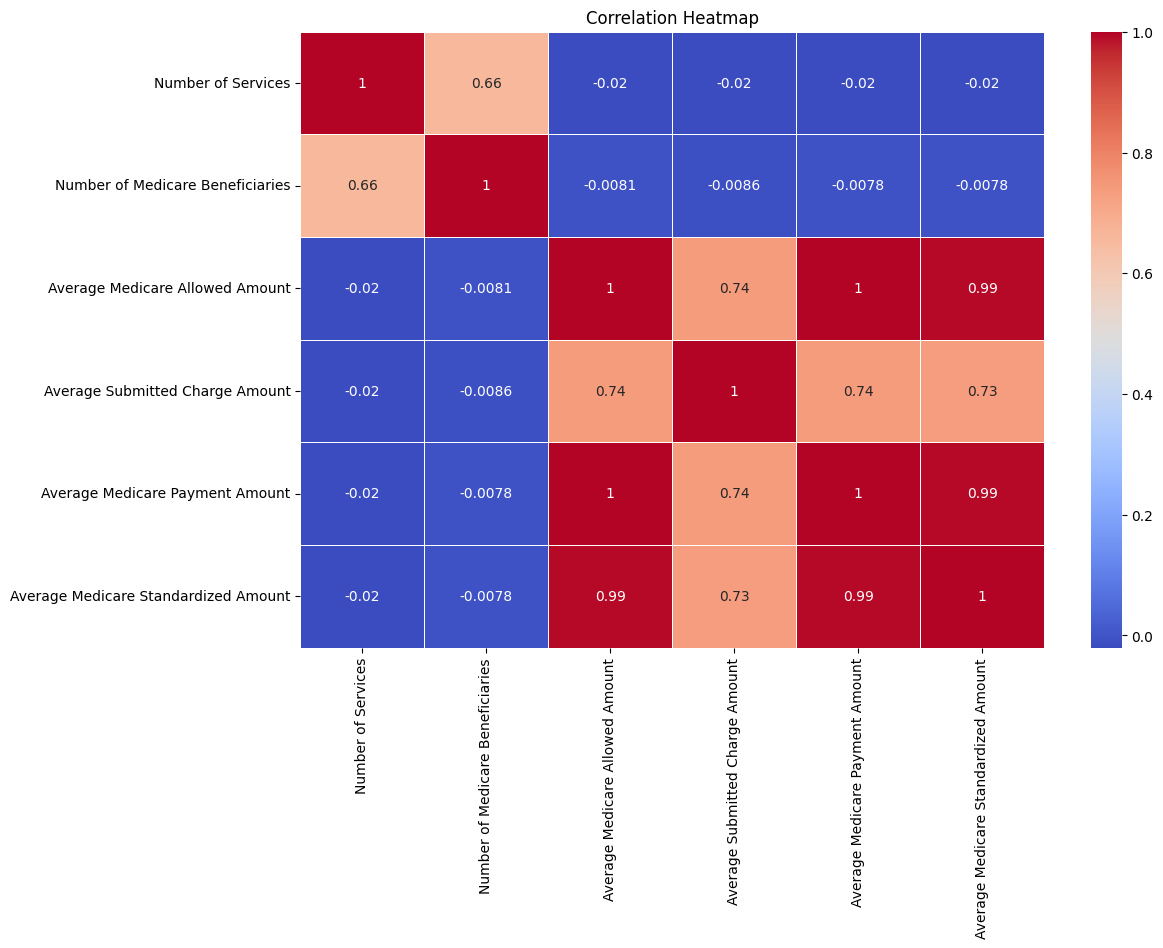

In [138]:
plt.figure(figsize=(12, 8))
corr = df[['Number of Services', 'Number of Medicare Beneficiaries', 
             'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
             'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']].corr()

sn.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


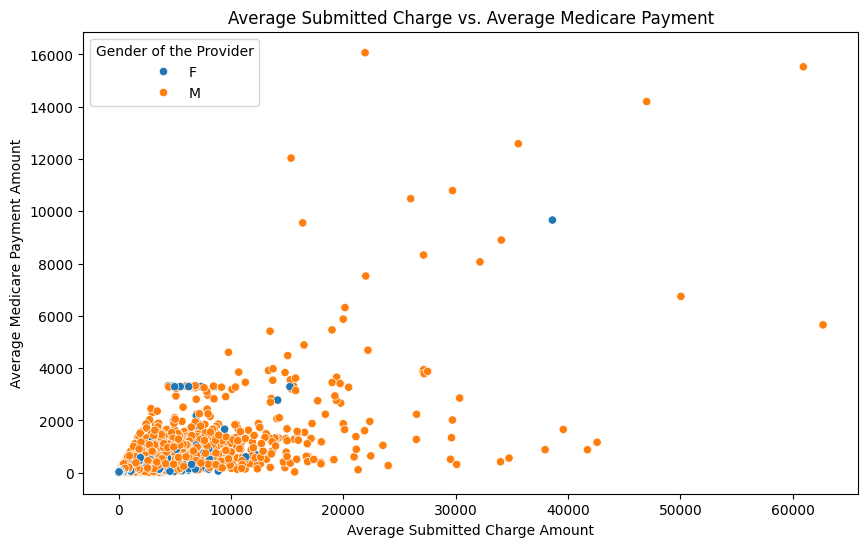

In [11]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', hue='Gender of the Provider')
plt.title('Average Submitted Charge vs. Average Medicare Payment')
plt.show()


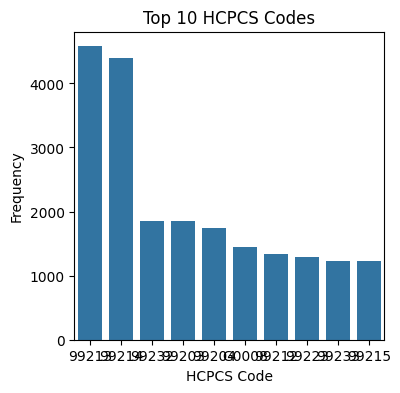

In [140]:
plt.figure(figsize=(4, 4))
top_hcpcs = df['HCPCS Code'].value_counts().nlargest(10)
sn.barplot(x=top_hcpcs.index, y=top_hcpcs.values)
plt.title('Top 10 HCPCS Codes')
plt.ylabel('Frequency')
plt.xlabel('HCPCS Code')
plt.show()


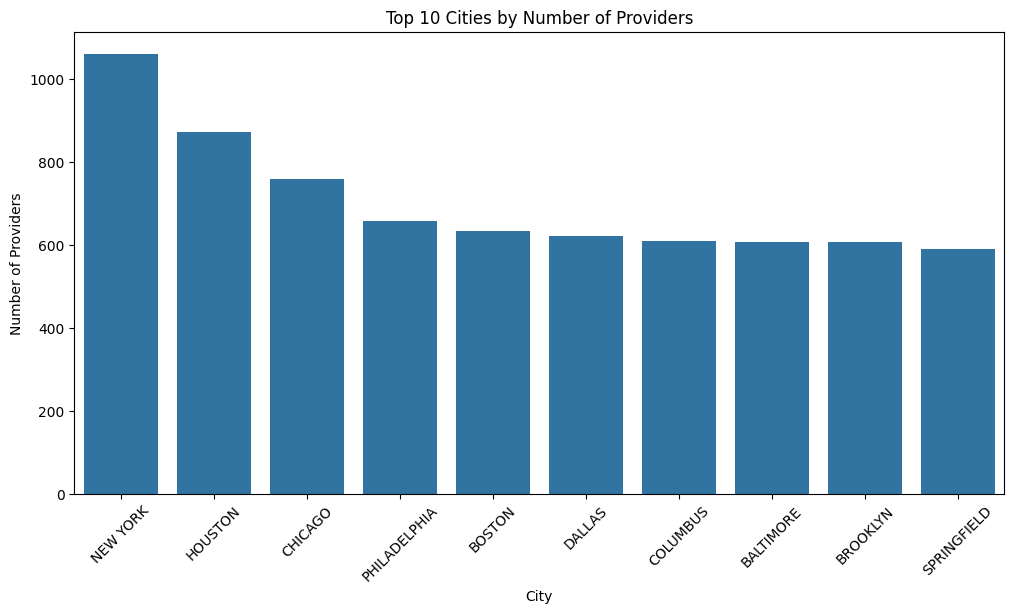

In [15]:
plt.figure(figsize=(12, 6))
top_cities = df['City of the Provider'].value_counts().nlargest(10)
sn.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Number of Providers')
plt.ylabel('Number of Providers')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


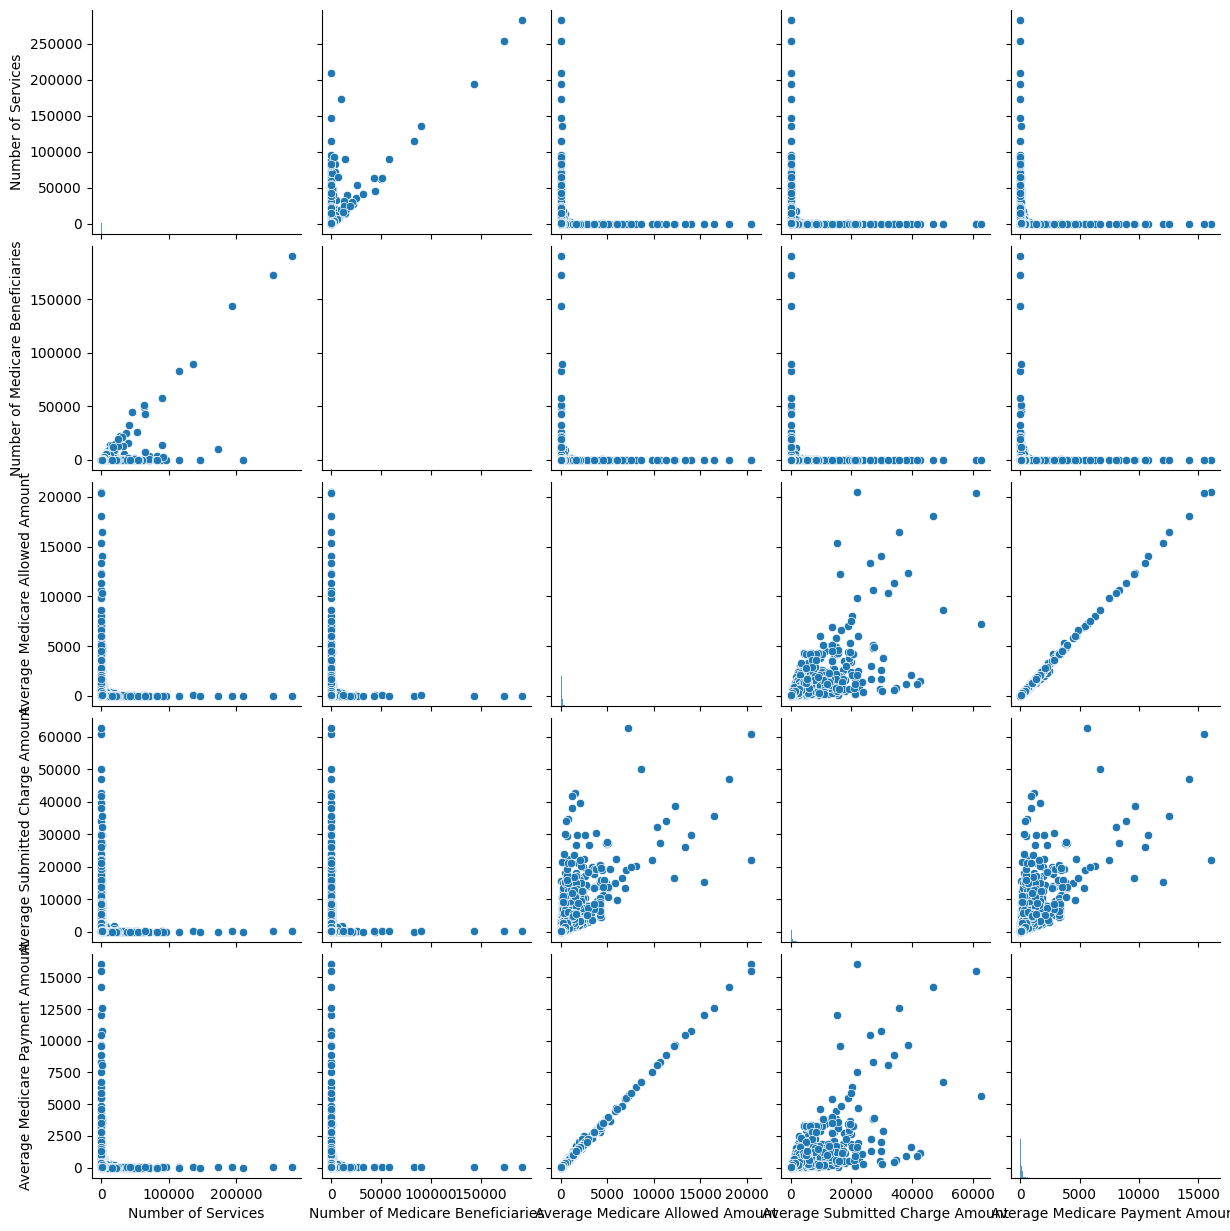

In [6]:
sn.pairplot(df[['Number of Services', 'Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount', 
                   'Average Submitted Charge Amount', 'Average Medicare Payment Amount']])
plt.show()

In [155]:
cols = ['Number of Services', 'Number of Medicare Beneficiaries', 
        'Number of Distinct Medicare Beneficiary/Per Day Services', 
        'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
        'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

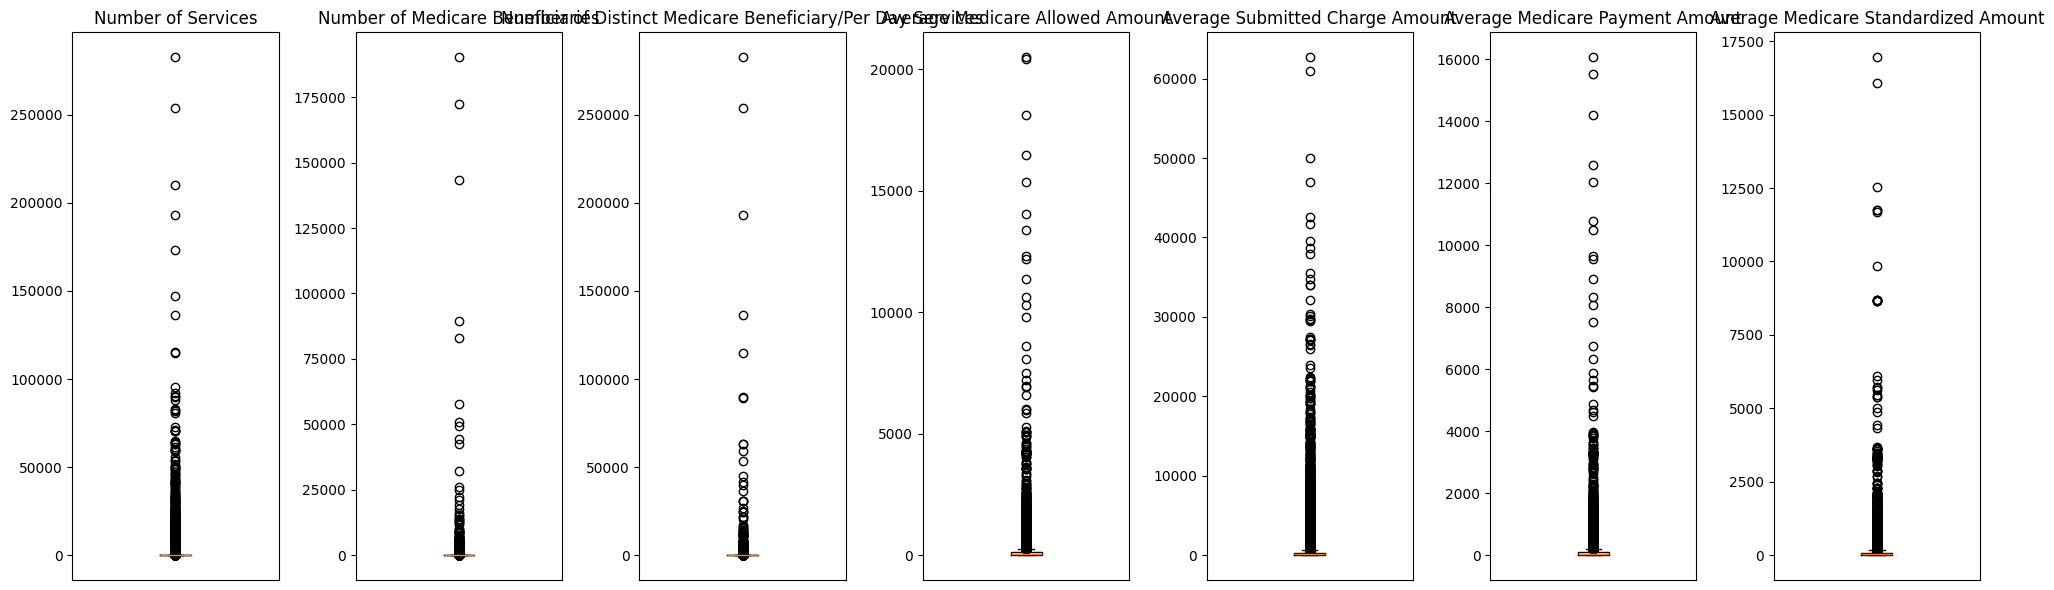

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 6))

for i, col in enumerate(cols):
    axs[i].boxplot(df[col])  
    axs[i].set_title(col)  
    axs[i].set_xticks([])  

plt.tight_layout()  
plt.show()

In [25]:
df_iqr = df.copy()
for col in cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # df_iqr[col] = df_iqr[col].apply(lambda x: lower_bound if x < lower_bound else(upper_bound if x > upper_bound else x))
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

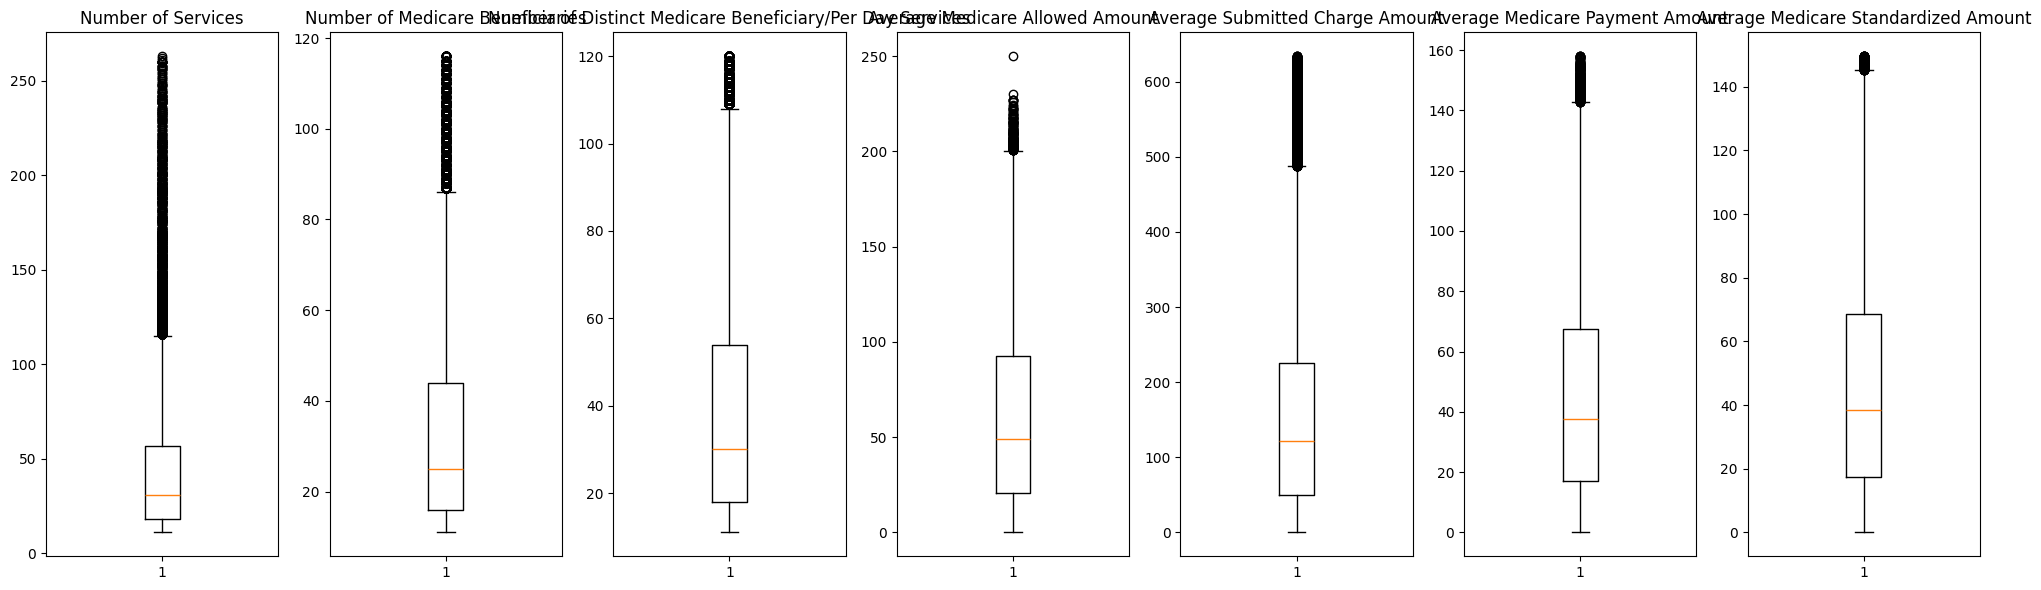

In [158]:
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 6))

for i, col in enumerate(cols):
    axs[i].boxplot(df_iqr[col])  
    axs[i].set_title(col)

plt.tight_layout() 
plt.show()

In [179]:
df_new2 = df.copy()
for col in cols:
    mean = df_new2[col].mean()
    std = df_new2[col].std()
    
    df_new2['z_score'] = (df_new2[col] - mean) / std
    
    df_new2 = df_new2[(df_new2['z_score'].abs() <= 3)]

df_new2 = df_new2.drop(columns=['z_score'])

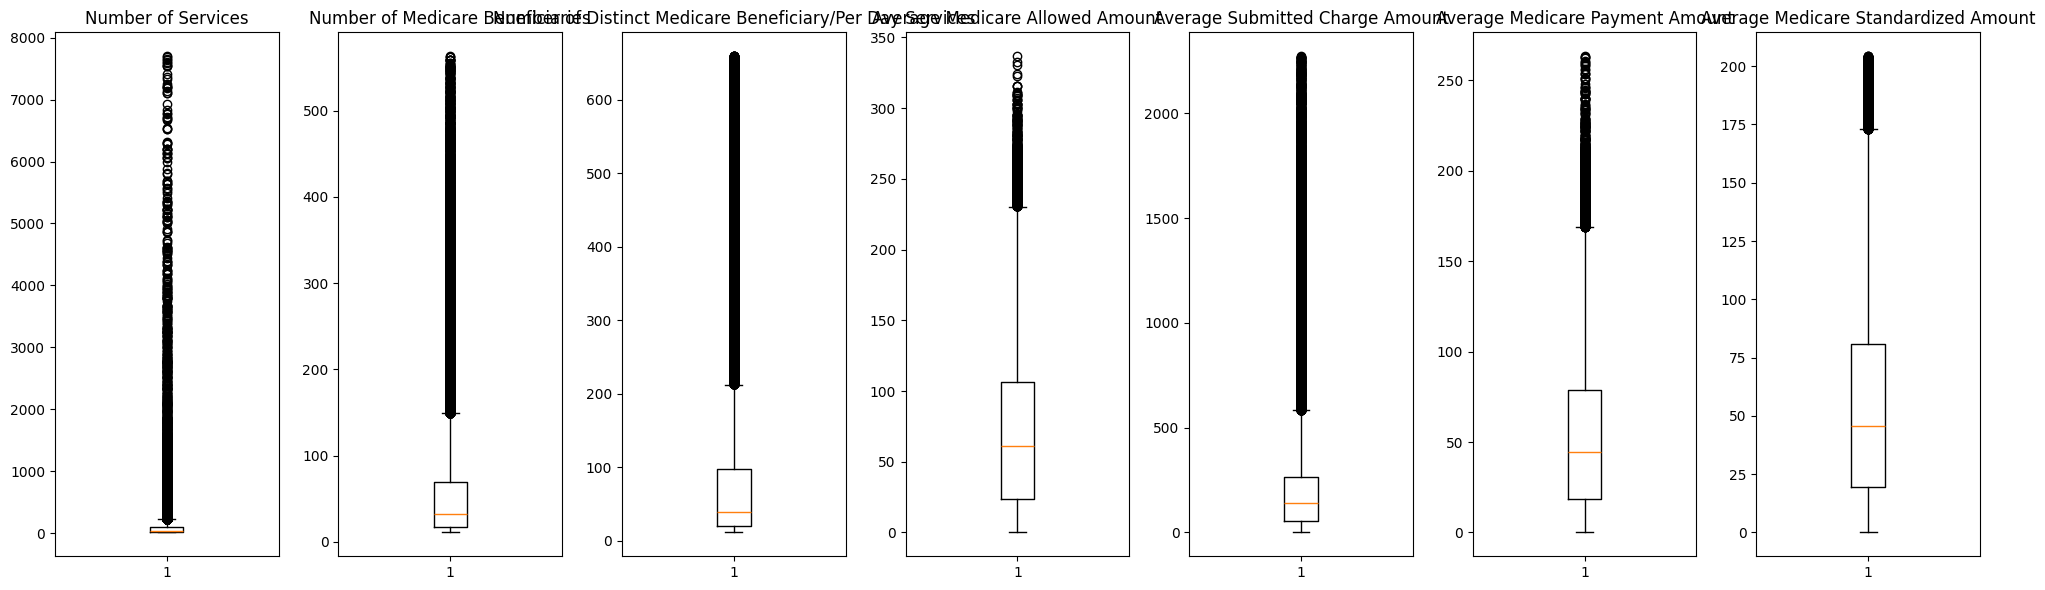

In [160]:
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 6))

for i, col in enumerate(cols):
    axs[i].boxplot(df_new2[col])  
    axs[i].set_title(col)

plt.tight_layout() 
plt.show()

In [27]:
cols_c=  ['Gender of the Provider','Entity Type of the Provider','HCPCS Drug Indicator','Medicare Participation Indicator']

In [28]:
df_encode = pd.get_dummies(df_iqr, columns= cols_c, drop_first= True)
df_encode = df_encode.replace({True: 'T', False: 'F'})
df_encode.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Entity Type of the Provider_O,HCPCS Drug Indicator_Y,Medicare Participation Indicator_Y
2,3001884,1306820956,DUROCHER,RICHARD,DPM,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,13,32,90.65,155.00,64.44,60.60,T,F,F,T
3,7594822,1770523540,FULLARD,JASPER,MD,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,18,20,3.50,5.00,3.43,3.43,T,F,F,T
4,746159,1073627758,PERROTTI,ANTHONY,DO,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,24,31,26.52,40.00,19.54,19.06,T,F,F,T
6,2137027,1215943535,BRUMITT,TOM,DO,70 DOCTORS PARK,CAPE GIRARDEAU,637034928.0,MO,US,...,19,21,45.97,164.57,36.04,37.78,T,F,F,T
7,6169160,1629160551,GALBREATH,RONALD,MD,12522 E. LAMBERT ROAD,WHITTIER,906062758.0,CA,US,...,50,52,29.33,50.00,28.74,25.32,T,F,F,T


In [29]:
df_copy = df_encode.copy()

In [30]:
city_target_mean = df_copy.groupby('City of the Provider')['Average Medicare Standardized Amount'].mean()
df_copy['City of the Provider Encoded'] = df_copy['City of the Provider'].map(city_target_mean)

overall_mean = df_copy['Average Medicare Standardized Amount'].mean()
df_copy['City of the Provider Encoded'] = df_copy['City of the Provider Encoded'].fillna(overall_mean)
df_copy['City of the Provider Encoded'] = df_copy['City of the Provider Encoded'].round(4)
df_copy[['City of the Provider', 'City of the Provider Encoded']].head(20)

,City of the Provider,City of the Provider Encoded
2,NORTH HAVEN,48.9862
3,KANSAS CITY,47.2413
4,JUPITER,38.0920
6,CAPE GIRARDEAU,31.6328
7,WHITTIER,32.5192
8,JACKSONVILLE,50.9938
9,DENVER,51.6066
10,WYNNEWOOD,70.8847
11,PHOENIX,49.5120
12,ASHLAND,44.7996


In [32]:
Credentials_encoded = df_copy['Credentials of the Provider'].value_counts()/len(df_copy)

df_copy['Credentials of the Provider Encoded'] = df_copy['Credentials of the Provider'].map(Credentials_encoded)
df_copy['Credentials of the Provider Encoded'] = df_copy['Credentials of the Provider Encoded'].round(4)
df_copy[['Credentials of the Provider', 'Credentials of the Provider Encoded']].head(20)

,Credentials of the Provider,Credentials of the Provider Encoded
2,DPM,0.0206
3,MD,0.7304
4,DO,0.0627
6,DO,0.0627
7,MD,0.7304
8,DO,0.0627
9,MD,0.7304
10,MD,0.7304
11,MD,0.7304
12,MD,0.7304


In [33]:
target_mean = df_copy.groupby('HCPCS Code')['Average Medicare Standardized Amount'].mean()
df_copy['HCPCS Code Encoded'] = df_copy['HCPCS Code'].map(target_mean)

overall_mean = df_copy['Average Medicare Standardized Amount'].mean()
df_copy['HCPCS Code Encoded'] = df_copy['HCPCS Code Encoded'].fillna(overall_mean)
df_copy['HCPCS Code Encoded'] = df_copy['HCPCS Code Encoded'].round(4)
df_copy[['HCPCS Code', 'HCPCS Code Encoded']].head(20)

,HCPCS Code,HCPCS Code Encoded
2,99348,57.0194
3,81002,3.4255
4,96372,17.6015
6,20610,42.0118
7,G0008,24.5272
8,80061,14.4355
9,84392,6.3800
10,99215,97.3309
11,74000,8.5538
12,72170,10.6153


In [36]:
cols = ['Number of Services', 'Number of Medicare Beneficiaries', 
        'Number of Distinct Medicare Beneficiary/Per Day Services', 
        'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
        'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

In [44]:
df_copy[cols] = (df_copy[cols] - df_copy[cols].min())/(df_copy[cols].max() - df_copy[cols].min())
df_copy[cols] = df_copy[cols].round(4)

In [45]:
df_copy.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Entity Type of the Provider_O,HCPCS Drug Indicator_Y,Medicare Participation Indicator_Y,City of the Provider Encoded,Credentials of the Provider Encoded,HCPCS Code Encoded
2,3001884,1306820956,DUROCHER,RICHARD,DPM,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,0.2445,0.4079,0.4050,T,F,F,T,48.9862,0.0206,57.0194
3,7594822,1770523540,FULLARD,JASPER,MD,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,0.0079,0.0216,0.0229,T,F,F,T,47.2413,0.7304,3.4255
4,746159,1073627758,PERROTTI,ANTHONY,DO,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,0.0631,0.1236,0.1273,T,F,F,T,38.0920,0.0627,17.6015
6,2137027,1215943535,BRUMITT,TOM,DO,70 DOCTORS PARK,CAPE GIRARDEAU,637034928.0,MO,US,...,0.2596,0.2281,0.2524,T,F,F,T,31.6328,0.0627,42.0118
7,6169160,1629160551,GALBREATH,RONALD,MD,12522 E. LAMBERT ROAD,WHITTIER,906062758.0,CA,US,...,0.0789,0.1819,0.1692,T,F,F,T,32.5192,0.7304,24.5272
